# Random Forest regression
---

Using RandomForestRegressor to build prediction model

## Import libraries and data

In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# read DataFrame
df = pd.read_csv("../notebook/data/ny_rental_data_cleaned.r2.csv")

## Read DataFrame and split into test/train samples

In [3]:
# features used for linear regression
df_base = df[["longitude","latitude","bathrooms","bedrooms","leaseLength","rating","sqft","pet_cat","pet_dog","built_year","property_size"]]
df_extra = df.filter(regex="amenity")

# concatenate DataFrames
X = pd.concat([df_base, df_extra],  axis=1)

# target of the regression model
y = df["rent"]

In [4]:
# split the sample into train and test sample
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

## RandomForestRegressor

In [5]:
from sklearn.ensemble import RandomForestRegressor

# initialize decision tree regressor
model = RandomForestRegressor(max_features=8, n_estimators=20)

### Estimate mean squared error

In [6]:
# fit train sample
model.fit(X_train, y_train)

# prediction
y_prediction_test = model.predict(X_test)

from sklearn import metrics
print(metrics.mean_squared_error(y_test,y_prediction_test))

5418875.39546


### Learning curves

In [7]:
# lists to hold train and test error
error_train, error_test = [], []

# step size for learning curve
step_size = 20
itr = 0

In [8]:
# iterate with specified step size
while True:

    # increase step
    itr = itr + 1

    # set sample size
    size = itr * step_size


    # limited sample size is smaller than the whole sample
    if size < len(X_train):

        # fit model with limited sample size
        model.fit(X_train[:size], y_train[:size])

        # make prediction on train and test samples
        y_prediction_train = model.predict(X_train[:size])
        y_prediction_test = model.predict(X_test)

        # record mean squared error on train and test samples
        error_train.append(metrics.mean_squared_error(y_train[:size],y_prediction_train))
        error_test.append(metrics.mean_squared_error(y_test,y_prediction_test))
        
    # calculate train/test error using the entire set
    else:

        # fit model with limited sample size
        model.fit(X_train[:size], y_train[:size])

        # make prediction on train and test samples
        y_prediction_train = model.predict(X_train[:size])
        y_prediction_test = model.predict(X_test[:size])

        # record mean squared error on train and test samples
        error_train.append(metrics.mean_squared_error(y_train[:size],y_prediction_train))
        error_test.append(metrics.mean_squared_error(y_test,y_prediction_test))

        # break out of while loop
        break;

(0, 5000)

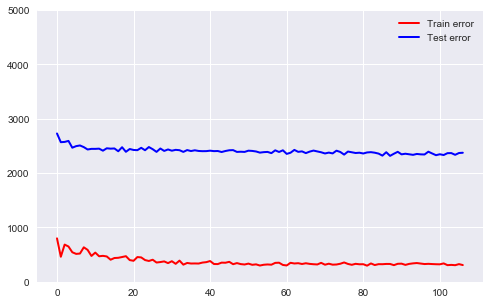

In [9]:
# create axes
fig, ax = plt.subplots(1,1,figsize=(8,5))

# plot learning curve
ax.plot(np.sqrt(error_train), "r-+", linewidth=2, label="Train error")
ax.plot(np.sqrt(error_test), "b-x", linewidth=2, label="Test error")

# customize plots
ax = plt.gca()
ax.legend()
ax.set_ylim([0,5000])